In [1]:
#import required libraries for data cleansing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
datafile="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(datafile)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#convert dates to proper format
df["INCDATE"] = pd.to_datetime(pd.DatetimeIndex(df['INCDATE']).date)
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.replace("?", np.nan, inplace = True)

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
df.shape

(194673, 38)

In [7]:
df.drop(['INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1','SEVERITYDESC'
,'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY'],axis=1,inplace=True)

In [8]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,1,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,...,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,-122.347294,47.647172,2,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,...,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,-122.334540,47.607871,3,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,...,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,-122.334803,47.604803,4,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,...,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,-122.306426,47.545739,5,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,...,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


In [9]:
# convert date column to datetime format 
df["year"] = pd.DatetimeIndex(df.INCDATE).year 
df["month"] = pd.DatetimeIndex(df.INCDATE).month  
df["day"] = pd.DatetimeIndex(df.INCDATE).day  
df['dayofweek']= pd.DatetimeIndex(df.INCDATE).dayofweek
df['Hour'] = pd.DatetimeIndex(df.INCDTTM).hour.astype(int)
# group objectID by year for visualization
df_yr = round(100*(df[["year","OBJECTID"]].groupby(by=["year"]).count()/len(df)), 2)

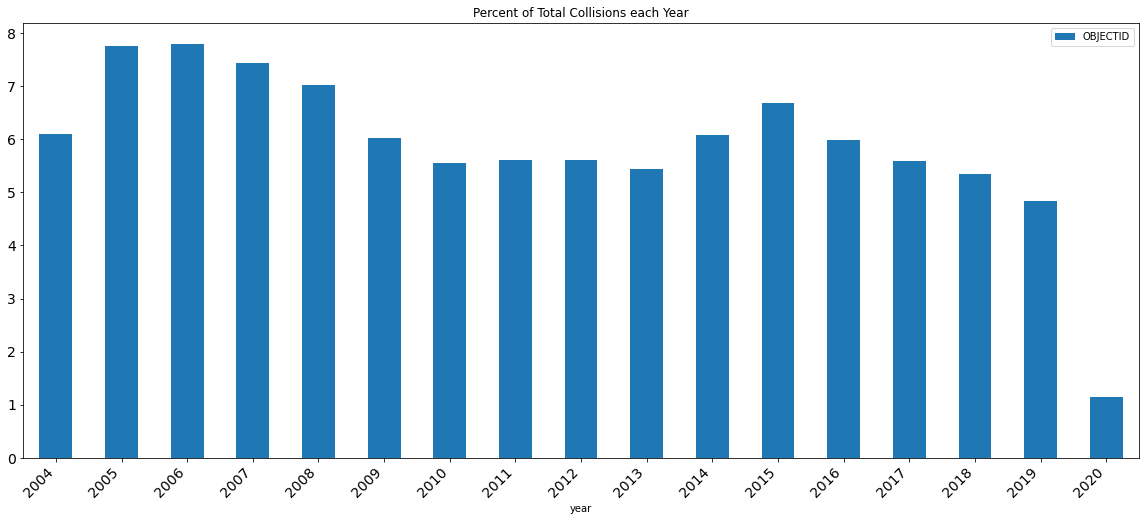

In [10]:
df_yr.plot(kind='bar', figsize=(20, 8));
plt.title("Percent of Total Collisions each Year")
plt.xticks(rotation=45, ha='right', size=14)
plt.yticks(size=14)
plt.show()

In [11]:
# removing year 2020 records as it has too few values/accidents recorded to train the dataset
df = df[df["year"] != 2020]

In [12]:
print("INATTENTIONIND",df['INATTENTIONIND'].value_counts().to_frame('count'))

INATTENTIONIND    count
Y  29805


29805 collisions due to inattention

In [13]:
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace('Y',1, inplace=True)
df[["INATTENTIONIND"]] = df[["INATTENTIONIND"]].astype("int")

In [14]:
print("UNDERINFL",df['UNDERINFL'].value_counts().to_frame('count'))

UNDERINFL    count
N  99013
0  80394
Y   5126
1   3995


5126 collisions due to under influence of drugs or alcohol + 3995 more. Assuming 1 and Y both mean yes. and 0 and N mean no

In [15]:
df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N',0, inplace=True)
df["UNDERINFL"].replace('Y',1, inplace=True)
df[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")

In [16]:
print("PEDROWNOTGRNT",df['PEDROWNOTGRNT'].value_counts().to_frame('count'))

PEDROWNOTGRNT    count
Y   4631


4631 collisions where pedestrian right of way was not granted

In [17]:
df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace('Y',1, inplace=True)
df[["PEDROWNOTGRNT"]] = df[["PEDROWNOTGRNT"]].astype("int")

In [18]:
print("SPEEDING",df['SPEEDING'].value_counts().to_frame('count'))

SPEEDING    count
Y   9261


9261 collisions where the driver was speeding

In [19]:
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace('Y',1, inplace=True)
df[["SPEEDING"]] = df[["SPEEDING"]].astype("int")

In [20]:
print("HITPARKEDCAR",df['HITPARKEDCAR'].value_counts().to_frame('count'))

HITPARKEDCAR     count
N  185524
Y    6904


6904 collisions where a parked car was hit

In [21]:
df["HITPARKEDCAR"].replace('N',0, inplace=True)
df["HITPARKEDCAR"].replace('Y',1, inplace=True)
df[["HITPARKEDCAR"]] = df[["HITPARKEDCAR"]].astype("int")

In [22]:
df["LIGHTCOND"].replace('Other','Unknown', inplace=True)
df["LIGHTCOND"].replace(np.nan, 'Unknown', inplace=True)
print("LIGHTCOND",df['LIGHTCOND'].value_counts().to_frame('count'))

LIGHTCOND                            count
Daylight                  115407
Dark - Street Lights On    48104
Unknown                    17860
Dusk                        5862
Dawn                        2480
Dark - No Street Lights     1522
Dark - Street Lights Off    1193


most collisions in daylight

In [23]:
df['LIGHTCOND'].isna().sum()

0

In [24]:
df["LIGHTCOND"].replace('Dusk','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dawn','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dark - No Street Lights','Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights On', 'Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights Off','Dark', inplace=True)

Text(0.5, 1.0, 'Light Conditions by Severity')

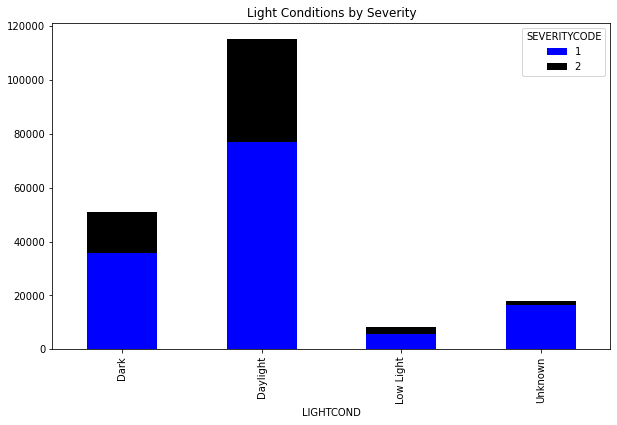

In [25]:
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','#000000'),figsize=(10, 6)   )
plt.title("Light Conditions by Severity")


highest number of collisions in daylight

Text(0.5, 1.0, 'Light Conditions by Hour')

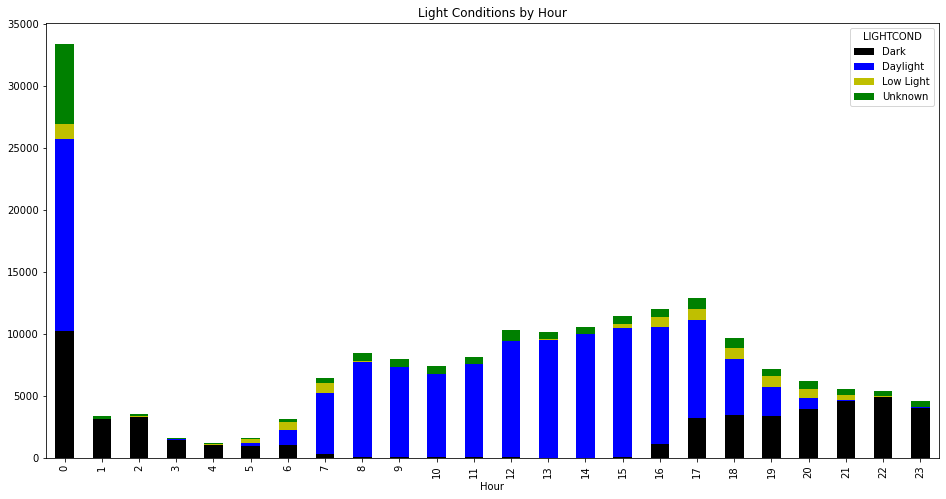

In [26]:
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#000000','b','y','g'),figsize=(16, 8)   )
plt.title("Light Conditions by Hour")

In [27]:
df = df[((df["Hour"] == 0 )& (df["LIGHTCOND"]=='Dark')) | (df["Hour"] != 0)]

In [28]:
df.loc[df['Hour'].isin([0,1,2,3,4,5,19,20,21,22,23])&(df["LIGHTCOND"]=='Unknown'), 'LIGHTCOND'] = 'Dark'
df.loc[(df['Hour'] >= 6)&(df['Hour'] <= 18)&(df["LIGHTCOND"]=='Unknown') ,'LIGHTCOND'] = 'Daylight'

Text(0.5, 1.0, 'Light Conditions by Hour')

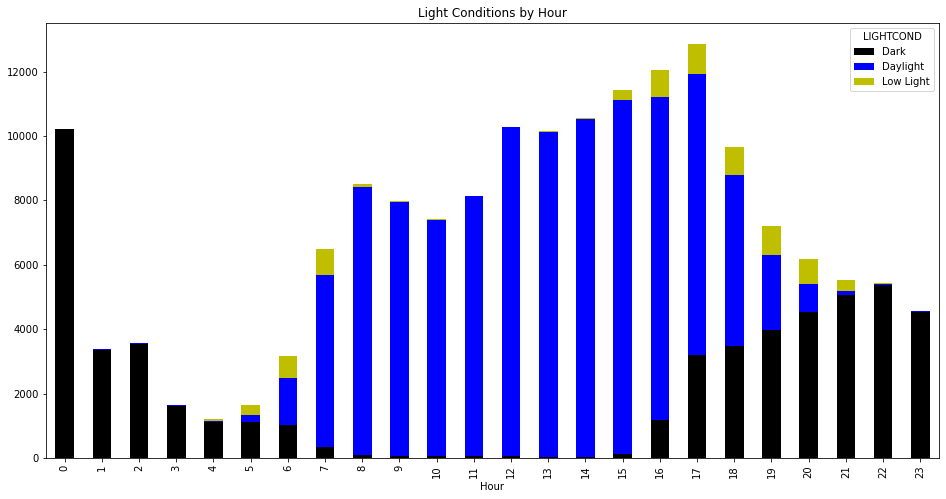

In [29]:
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#000000','b','y','g') ,figsize=(16, 8)   )
plt.title("Light Conditions by Hour")

Text(0.5, 1.0, 'Light Conditions by Severity')

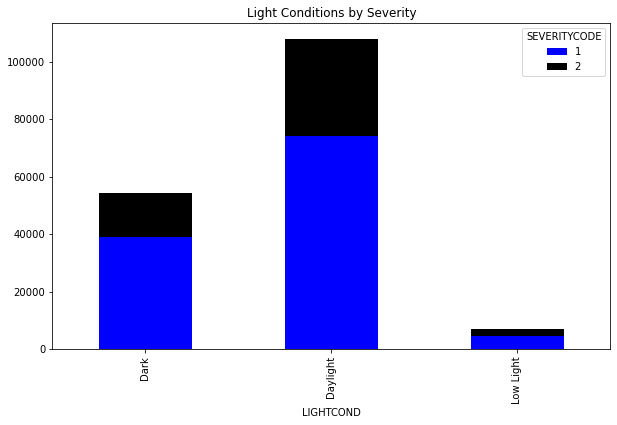

In [30]:
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','#000000')  ,figsize=(10, 6)   )
plt.title("Light Conditions by Severity")

In [31]:
#replace other and nulls with unknown
df["WEATHER"].replace(np.nan,'Unknown', inplace=True)
df["WEATHER"].replace('Other','Unknown', inplace=True)
print("WEATHER",df['WEATHER'].value_counts().to_frame('count'))
print("Unknown",df['WEATHER'].isna().sum())

WEATHER                           count
Clear                     99299
Raining                   30161
Overcast                  24651
Unknown                   13649
Snowing                     806
Fog/Smog/Smoke              547
Sleet/Hail/Freezing Rain     99
Blowing Sand/Dirt            51
Severe Crosswind             25
Unknown 0


In [32]:
df.loc[(df['WEATHER'] != 'Clear') & (df['WEATHER'] != 'Unknown'),'WEATHER'] = 'Unclear'

Text(0.5, 1.0, 'Weather by Severity')

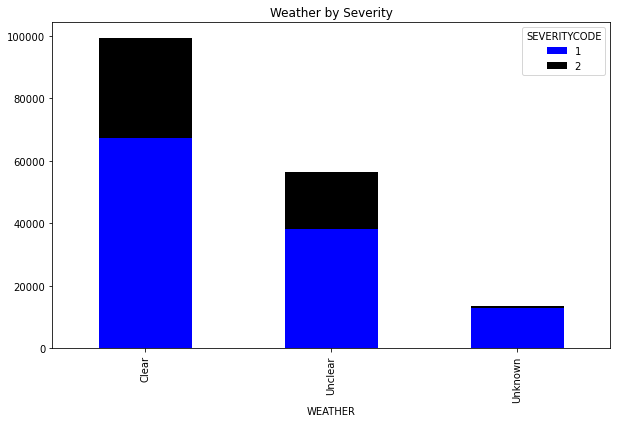

In [33]:
df.pivot_table(index='WEATHER',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','#000000')    ,figsize=(10, 6)   )
plt.title("Weather by Severity")

most collisions happen in clear or unclear weather with larger number of SEVERITYCODE  1 and 2 both ahppening in clear weather

Text(0.5, 1.0, 'Weather across Month')

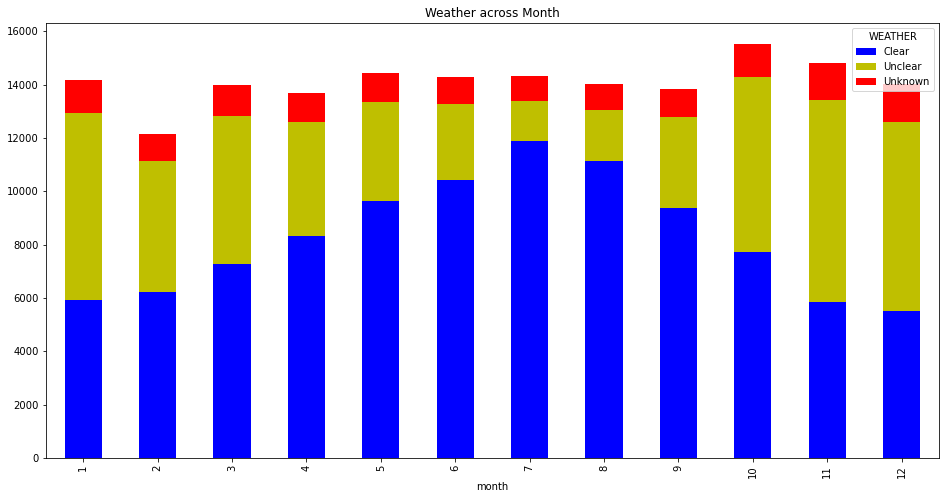

In [34]:
#how is weather in Seattle across the year
df.pivot_table(index= ('month'),columns='WEATHER', aggfunc='size').plot.bar(stacked=True , color = ('b','y','r')    ,figsize=(16, 8)   )
plt.title("Weather across Month")

In [35]:
#assuming that weather will be same on day across seattle. so replace the data where weather is unknown with the datadata where weather is not unknown and dates are matching 
df_notnull=df.loc[df['WEATHER']!='Unknown']
df_notnull = df_notnull[['INCDATE','WEATHER']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('INCDATE',inplace=True) 
s=df_notnull.to_dict()['WEATHER']
df.loc[df['WEATHER']=='Unknown','WEATHER']=df[('INCDATE')].map(s)
df = df[df["WEATHER"].notna()]

Text(0.5, 1.0, 'Weather by Severity')

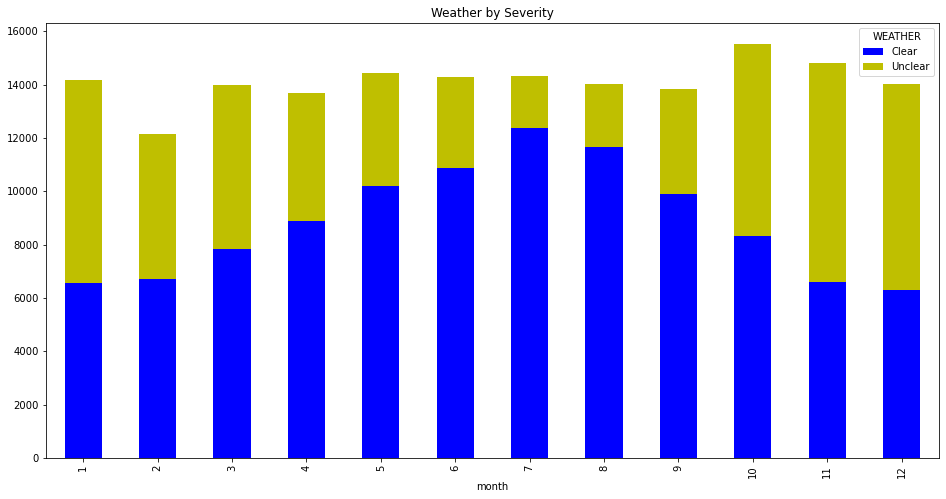

In [36]:
df.pivot_table(index= ('month'),columns='WEATHER', aggfunc='size').plot.bar(stacked=True , color = ('b','y','r')    ,figsize=(16, 8)   )
plt.title("Weather by Severity")

Text(0.5, 1.0, 'Weather by Severity')

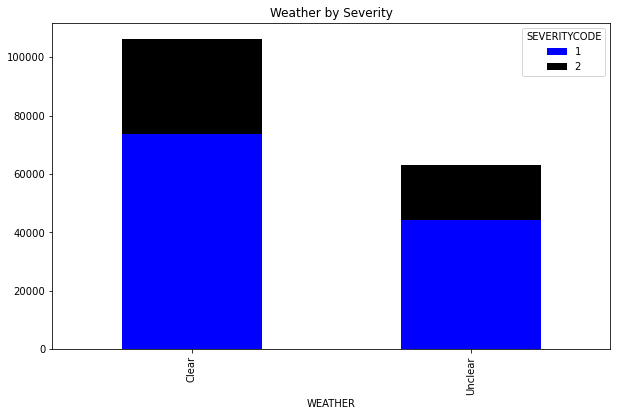

In [37]:
df.pivot_table(index='WEATHER',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','#000000')    ,figsize=(10, 6)   )
plt.title("Weather by Severity")

In [38]:
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
df["ROADCOND"].replace('Other','Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())

ROADCOND                  count
Dry             110988
Wet              43042
Unknown          13020
Ice               1112
Snow/Slush         899
Standing Water     103
Sand/Mud/Dirt       64
Oil                 57
Unknown 0


roads are mostly dry

Text(0.5, 1.0, 'Road Conditions by Severity')

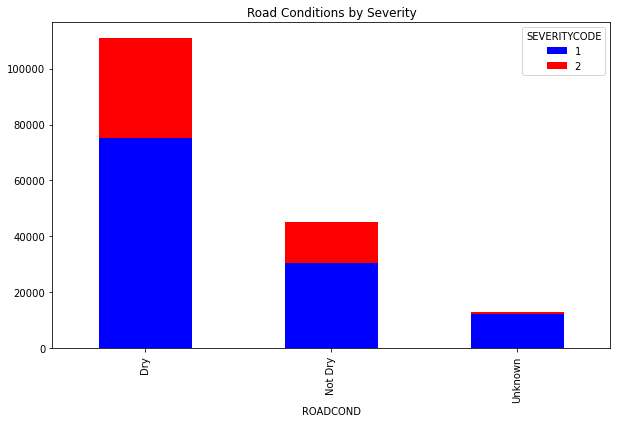

In [39]:
#classify wet road condition as not dry 
df.loc[(df['ROADCOND'] != 'Dry') & (df['ROADCOND'] != 'Unknown'),'ROADCOND'] = 'Not Dry'
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r')    ,figsize=(10, 6)   )
plt.title("Road Conditions by Severity")

In [40]:
#creating a key with date and location
df["Key1"]=df['INCDATE'].astype(str)+df['LOCATION']

In [41]:
#using the key's let's replace unknown
df_notnull=df.loc[df['ROADCOND']!='Unknown']
df_notnull = df_notnull[['Key1','ROADCOND']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('Key1',inplace=True) 
s=df_notnull.to_dict()['ROADCOND']
df.loc[df['ROADCOND']=='Unknown','ROADCOND']=df[('Key1')].map(s)
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())

ROADCOND           count
Dry      111033
Not Dry   46307
Unknown   11945
Unknown 0


Text(0.5, 1.0, 'Road Conditions by Month')

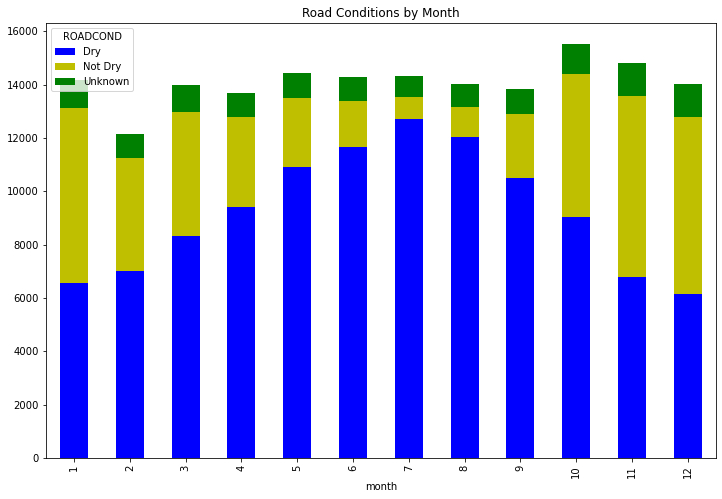

In [42]:
df.pivot_table(index= ('month'),columns='ROADCOND', aggfunc='size').plot.bar(stacked=True , color = ('b','y','g') ,figsize=(12, 8)  )
plt.title("Road Conditions by Month")

In [43]:
#as road conditions are dry and not dry, we can say that road in Seattle are mostly dry during match to oct. with this assumption let's remove the nulls/unknowns
df.loc[df['month'].isin([1,2,11,12])&(df["ROADCOND"]=='Unknown'), 'ROADCOND'] = 'Dry'
df.loc[(df['month'] >= 3)&(df['month'] <= 10)&(df["ROADCOND"]=='Unknown') ,'ROADCOND'] = 'Not Dry'

Text(0.5, 1.0, 'Road Conditions by Month')

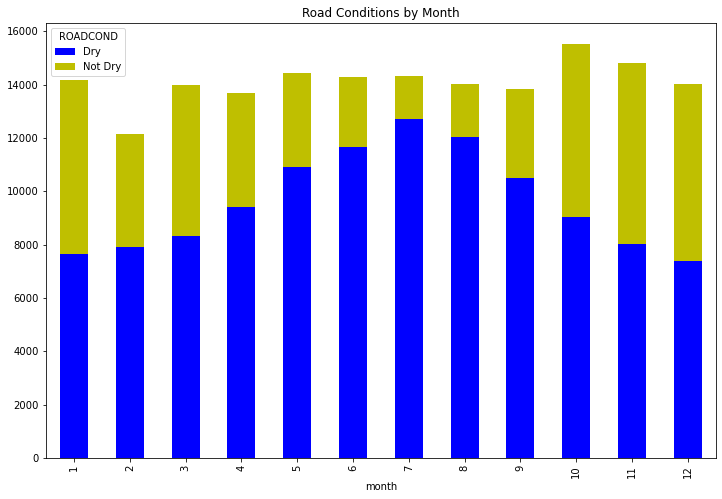

In [44]:
df.pivot_table(index= ('month'),columns='ROADCOND', aggfunc='size').plot.bar(stacked=True , color = ('b','y','g') ,figsize=(12, 8)  )
plt.title("Road Conditions by Month")

roads are dry during the middle of the year. mostly wet from october to january

Text(0.5, 1.0, 'Road Conditions by Severity')

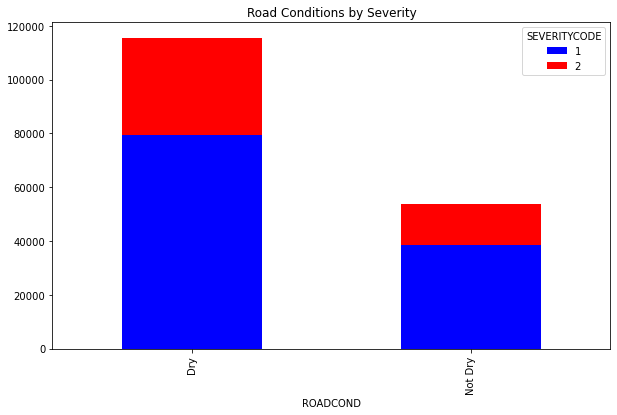

In [45]:
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r')    ,figsize=(10, 6)   )
plt.title("Road Conditions by Severity")

majority of accidents are happening on dry roads

In [46]:
#there are lots of other data in collision type, only 21 unknowns let's get rid of it
print("COLLISIONTYPE",df['COLLISIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['COLLISIONTYPE'].isna().sum())
df = df[df["COLLISIONTYPE"].notna()]

COLLISIONTYPE             count
Parked Car  42335
Angles      31100
Rear Ended  30277
Other       21085
Sideswipe   16637
Left Turn   12351
Pedestrian   6068
Cycles       4937
Right Turn   2626
Head On      1848
Unknown 21


In [47]:
#let's use ST_COLCODE to fill other value, first let's map the records where collision type as other with ST_COLCODE 
dfcollision = df[(df["COLLISIONTYPE"]=='Other')]
dfcollision=dfcollision[["ST_COLCODE","COLLISIONTYPE","SEVERITYCODE"]]
dfcollision.reset_index(inplace=True,drop = True)
dfcollision = dfcollision[dfcollision["ST_COLCODE"].notna()]
dfcollision = dfcollision[dfcollision["ST_COLCODE"] !=' ']
#dfcollision.drop_duplicates(inplace=True)
dfcollision[["ST_COLCODE"]] = dfcollision[['ST_COLCODE']].astype("int")

<AxesSubplot:xlabel='ST_COLCODE'>

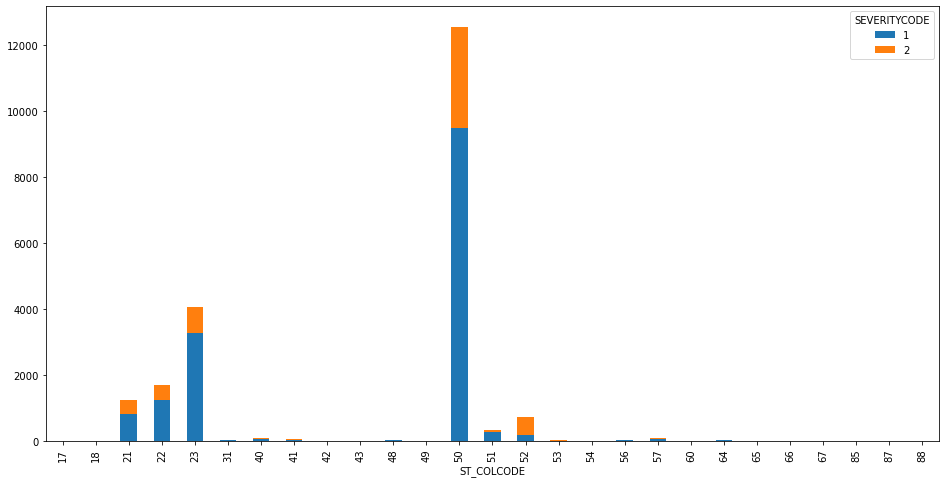

In [48]:
dfcollision.pivot_table(index= ('ST_COLCODE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True ,figsize=(16, 8)   )

In [49]:
print(dfcollision["ST_COLCODE"].unique())

[23 22 51 50 21 52 66 40 57 56 41 17 67 49 31 65 42 48 64 53 54 60 43 87
 85 88 18]


In [50]:
# there are few colcodes which we can use, based on metadata we will now replace collision type with correct values

df = df[df["ST_COLCODE"].notna()]
df = df[df["ST_COLCODE"] !=' ']
df[["ST_COLCODE"]] = df[['ST_COLCODE']].astype("int")

In [51]:
#dropping these which are not in metadata or contain very less data
df = df[~df["ST_COLCODE"].isin([17,18,31,40,41,42,43,48,49,53,54,56,57,60,64,65,66,67,85,87,88])]

In [52]:
df.loc[df['ST_COLCODE'].isin([51,50]), 'COLLISIONTYPE'] = 'Struck Object'
df.loc[df['ST_COLCODE'].isin([21,22]), 'COLLISIONTYPE'] = 'Driveway'
df.loc[df['ST_COLCODE'].isin([52]), 'COLLISIONTYPE'] = 'Breakdown'
df.loc[df['ST_COLCODE'].isin([23]), 'COLLISIONTYPE'] = 'Same Direction'
df.drop(columns=[ 'ST_COLCODE'],axis=1,inplace=True)

Text(0.5, 1.0, 'Collision Type by Severity')

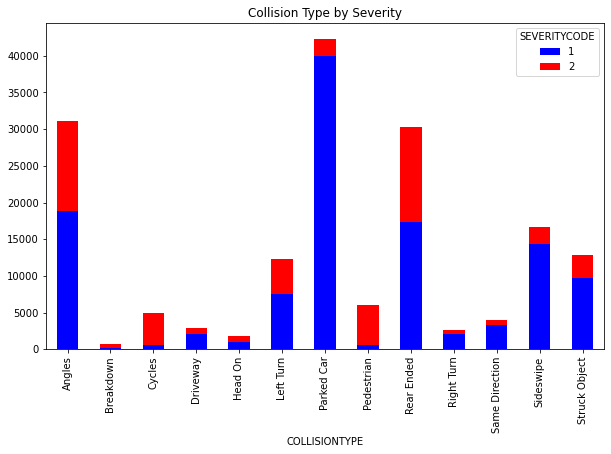

In [53]:
df.pivot_table(index='COLLISIONTYPE',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r') ,figsize=(10,6)  )
plt.title("Collision Type by Severity")

severity 1 happened mostly against parked cars while severity 2 was collision at angles or rear ended

In [54]:
# looking at the address field. replacing null values
df["ADDRTYPE"].replace(np.nan,'Unknown', inplace=True)
df_notnull=df.loc[df['ADDRTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','ADDRTYPE']]                    
df_notnull.drop_duplicates(inplace=True)

In [55]:
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['ADDRTYPE']
df.loc[df['ADDRTYPE']=='Unknown','ADDRTYPE']=df[('LOCATION')].map(s)
print("ADDRTYPE",df['ADDRTYPE'].value_counts().to_frame('count'))
print("is null",df['ADDRTYPE'].isna().sum())

ADDRTYPE                count
Block         109581
Intersection   56961
Alley           2246
is null 0


Text(0.5, 1.0, 'Address Type by Severity')

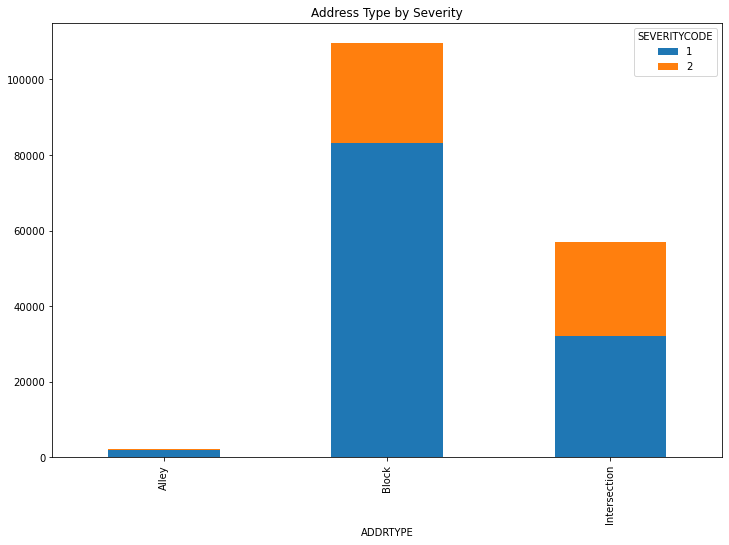

In [56]:
df.pivot_table(index= ('ADDRTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True  ,figsize=(12, 8)  )
plt.title("Address Type by Severity")

In [57]:
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['JUNCTIONTYPE'].isna().sum())

JUNCTIONTYPE                                                    count
Mid-Block (not related to intersection)            77983
At Intersection (intersection related)             54891
Mid-Block (but intersection related)               19244
Driveway Junction                                   8939
Unknown                                             5655
At Intersection (but not related to intersection)   1920
Ramp Junction                                        156
Unknown 0


In [58]:
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace({
   'Mid-Block (not related to intersection)':'Non Intersection' ,
   'At Intersection (intersection related)': 'Intersection Related',
   'Mid-Block (but intersection related)': 'Intersection Related',
   'At Intersection (but not related to intersection)':'Non Intersection',
    np.nan:'Unknown'
  })

Text(0.5, 1.0, 'Junction Type by Severity')

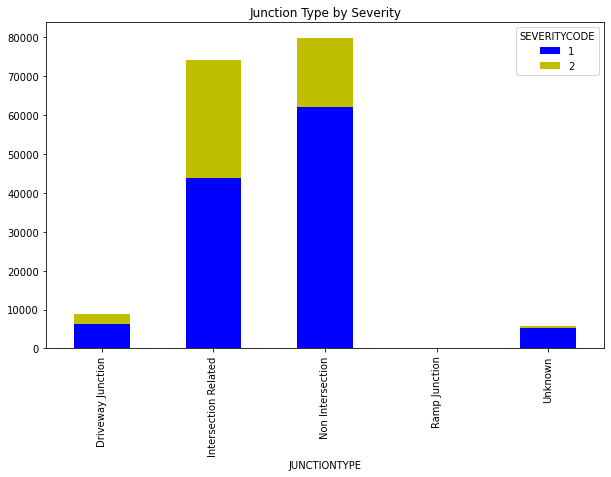

In [59]:
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','y') ,figsize=(10, 6)  )
plt.title("Junction Type by Severity")

highest cases of severity 1 at non intersection. highest cases of severity 2 at intersection

In [60]:
df_notnull=df.loc[df['JUNCTIONTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','JUNCTIONTYPE']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['JUNCTIONTYPE']
df.loc[df['JUNCTIONTYPE']=='Unknown','JUNCTIONTYPE']=df[('LOCATION')].map(s)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("is null",df['JUNCTIONTYPE'].isna().sum())
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)

JUNCTIONTYPE                       count
Non Intersection      81540
Intersection Related  75215
Driveway Junction      9740
Ramp Junction          1998
is null 295


Text(0.5, 1.0, 'Junction Type by Severity')

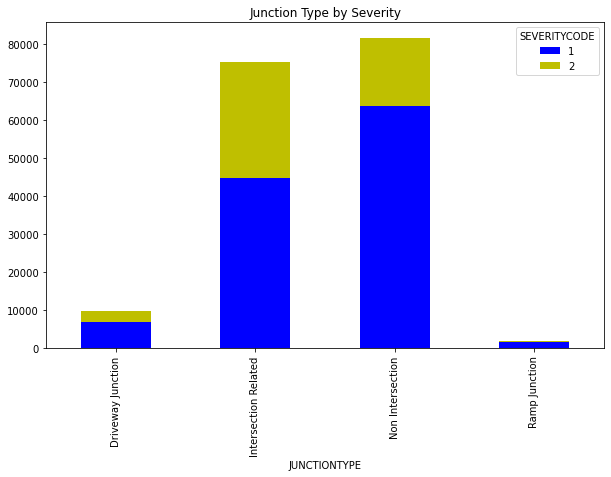

In [61]:
df = df[df["JUNCTIONTYPE"] != 'Unknown']
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','y') ,figsize=(10, 6)  )
plt.title("Junction Type by Severity")

In [62]:
#dropping the key set earlier
df.drop(['Key1'],axis=1,inplace=True)

In [63]:
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
accident_df=df.loc[(df['X'].notna()) & (df['year'] == 2016 ) &   (df['month'].isin([6,7,8,9,10,11,12]))]
               #& (df['year'].isin([2016,2017,2018,2019]) 
                 #   & (df['X'].notna())   )]
accident_df = accident_df[['X','Y','SEVERITYCODE','year']] 
accident_df['SEVERITYCODE'] = accident_df['SEVERITYCODE'].astype(str) 
print(accident_df.shape)
incidents = folium.map.FeatureGroup()
for lat, lng, label in zip(accident_df.Y, accident_df.X, accident_df.SEVERITYCODE):
    if label == '1':
        folium.features.Marker(
            [lat, lng],
            radius=2, # define how big you want the markers to be
            color='blue'#,
         ).add_to(seattle_map)
    else:
        folium.features.Marker(
            [lat, lng],
            radius=2, # define how big you want the markers to be
            color='red'#,
         ).add_to(seattle_map)

# show map
seattle_map

(6194, 4)


In [64]:
# let's drop the location. from the visualization it is evident that at a loction both types of accidents may occur. we shall not use X & Y as features
df.drop(['LOCATION'],axis=1,inplace=True)
df=df.loc[(df['X'].notna())]

<AxesSubplot:>

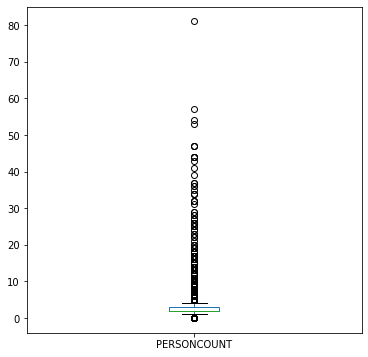

In [65]:
# box plot person count, in summary above there are lots of unique values
df['PERSONCOUNT'].plot(kind='box', figsize=(6, 6))

SEVERITYCODE,1,2
PERSONCOUNT-binned,,
Low,113640,50272
Medium,23,5
High,1,1


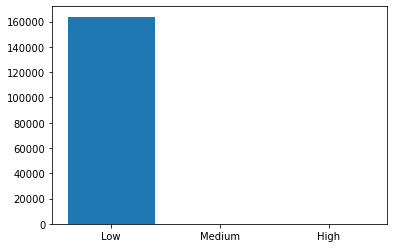

In [66]:
#there are lots of outliers, let's bin it and visualize
bins = np.linspace(min(df["PERSONCOUNT"]), max(df["PERSONCOUNT"]), 4)
group_names = ['Low', 'Medium', 'High']
df['PERSONCOUNT-binned'] = pd.cut(df['PERSONCOUNT'], bins, labels=group_names, include_lowest=True )
pyplot.bar(group_names, df["PERSONCOUNT-binned"].value_counts())
pd.crosstab(df['PERSONCOUNT-binned'],df['SEVERITYCODE'])

In [67]:
#as the binning showed that most of the data is in lowest bin and can't be used to determine severity (from the crosstab results)
df.drop(['PERSONCOUNT','PERSONCOUNT-binned'],axis=1,inplace=True)

In [68]:
#let's take a loot a pedcount, many accident's don't involve pedesterians, but even if 1 pedest is invloved the risk of higher severity increases
pd.crosstab(df['PEDCOUNT'],df['SEVERITYCODE'])

SEVERITYCODE,1,2
PEDCOUNT,,
0,113025,44594
1,623,5463
2,15,196
3,1,19
4,0,4
5,0,1
6,0,1


mostly severity type 2 when pedestrian count was 1 or 2

In [69]:
from scipy import stats

In [70]:
numerical_features = df.select_dtypes(include=["number"])
numerical_features.drop(columns=[ 'X', 'Y', 'OBJECTID','year','day'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [71]:
#let's calulate P values for the numerical features
col_name = numerical_features.columns
#['VEHCOUNT', 'INATTENTIONIND','UNDERINFL','SPEEDING', 'HITPARKEDCAR', 'month','dayofweek','PERSONCOUNT']
percof_smry = pd.DataFrame({'Column Name': [], 'Pearson Correlation Coefficient': [], 'P-value of': []})
for i in range (0,len(col_name)):
    pearson_coef, p_value = stats.pearsonr(df[col_name[i]], df['SEVERITYCODE'])
    percof_smry = percof_smry.append({"Column Name":col_name[i],"Pearson Correlation Coefficient": pearson_coef , "P-value of": p_value }, ignore_index=True)
print(percof_smry)

       Column Name  Pearson Correlation Coefficient     P-value of
0     SEVERITYCODE                         1.000000   0.000000e+00
1         PEDCOUNT                         0.251263   0.000000e+00
2      PEDCYLCOUNT                         0.217310   0.000000e+00
3         VEHCOUNT                        -0.088294  5.464418e-281
4   INATTENTIONIND                         0.040824   2.016460e-61
5        UNDERINFL                         0.043036   4.618621e-68
6    PEDROWNOTGRNT                         0.208156   0.000000e+00
7         SPEEDING                         0.038203   5.226122e-54
8     HITPARKEDCAR                        -0.106021   0.000000e+00
9            month                         0.004751   5.437663e-02
10       dayofweek                        -0.017850   4.910711e-13
11            Hour                         0.024883   7.009487e-24


In [72]:
categorical_features = df.select_dtypes(exclude = [np.number, np.datetime64])#.columns.tolist()
char_value=(categorical_features.columns)
print(char_value)

Index(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>
<p>large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. expect ANOVA to return a sizeable F-test score and a small p-value.</p>
<p>let's calculate avonva score for all categorical features.</p>

In [73]:

ANOVA_smry = pd.DataFrame({'Column Name': [], 'F Value': [], 'P value': []})
grouped_test=df[['LIGHTCOND', 'SEVERITYCODE']].groupby(['LIGHTCOND'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Daylight')['SEVERITYCODE']
                             ,grouped_test.get_group('Dark')['SEVERITYCODE']
                             ,grouped_test.get_group('Low Light')['SEVERITYCODE']
                            # ,grouped_test.get_group('Unknown')['SEVERITYCODE'] 
                             )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"LIGHTCOND","F Value": f_val , "P value": p_val }, ignore_index=True)

In [74]:
grouped_test=df[['ADDRTYPE', 'SEVERITYCODE']].groupby(['ADDRTYPE'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Intersection')['SEVERITYCODE']
                             ,grouped_test.get_group('Block')['SEVERITYCODE']
                                          )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"ADDRTYPE","F Value": f_val , "P value": p_val }, ignore_index=True)


In [75]:
grouped_test=df[['COLLISIONTYPE', 'SEVERITYCODE']].groupby(['COLLISIONTYPE'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Angles')['SEVERITYCODE']
                              ,grouped_test.get_group('Sideswipe')['SEVERITYCODE']
                              ,grouped_test.get_group('Parked Car')['SEVERITYCODE']
                              ,grouped_test.get_group('Rear Ended')['SEVERITYCODE']
                              ,grouped_test.get_group('Head On')['SEVERITYCODE']
                              ,grouped_test.get_group('Left Turn')['SEVERITYCODE']
                              ,grouped_test.get_group('Right Turn')['SEVERITYCODE']
                              ,grouped_test.get_group('Cycles')['SEVERITYCODE']
                              ,grouped_test.get_group('Driveway')['SEVERITYCODE']
                              ,grouped_test.get_group('Pedestrian')['SEVERITYCODE']   
                              ,grouped_test.get_group('Breakdown')['SEVERITYCODE']
                              ,grouped_test.get_group('Same Direction')['SEVERITYCODE'] 
                              ,grouped_test.get_group('Struck Object')['SEVERITYCODE']
                             )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"COLLISIONTYPE","F Value": f_val , "P value": p_val }, ignore_index=True)

In [76]:
grouped_test=df[['JUNCTIONTYPE', 'SEVERITYCODE']].groupby(['JUNCTIONTYPE'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Non Intersection')['SEVERITYCODE']
                             ,grouped_test.get_group('Intersection Related')['SEVERITYCODE']
                             ,grouped_test.get_group('Ramp Junction')['SEVERITYCODE']
                             ,grouped_test.get_group('Driveway Junction')['SEVERITYCODE']
                                         )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"JUNCTIONTYPE","F Value": f_val , "P value": p_val }, ignore_index=True)

In [77]:
grouped_test=df[['WEATHER', 'SEVERITYCODE']].groupby(['WEATHER'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Clear')['SEVERITYCODE']
                             ,grouped_test.get_group('Unclear')['SEVERITYCODE']
                            )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"WEATHER","F Value": f_val , "P value": p_val }, ignore_index=True)

In [78]:
grouped_test=df[['ROADCOND', 'SEVERITYCODE']].groupby(['ROADCOND'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Dry')['SEVERITYCODE']
                             ,grouped_test.get_group('Not Dry')['SEVERITYCODE']
                             #,grouped_test.get_group('Unknown')['SEVERITYCODE']
                        
                             )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"ROADCOND","F Value": f_val , "P value": p_val }, ignore_index=True)

In [79]:
ANOVA_smry

,Column Name,F Value,P value
0,LIGHTCOND,113.296989,6.756411e-50
1,ADDRTYPE,6929.297391,0.000000e+00
2,COLLISIONTYPE,3892.866144,0.000000e+00
3,JUNCTIONTYPE,2216.275852,0.000000e+00
4,WEATHER,14.132951,1.703928e-04
5,ROADCOND,119.806061,7.132669e-28


In [80]:
#based on p values using pearce coefficient and avanova let's drop the below colums

df.drop(columns=[ 'OBJECTID','year','day','WEATHER','PEDCOUNT','PEDCYLCOUNT','PEDROWNOTGRNT','HITPARKEDCAR','month','INCDATE', 'INCDTTM','LIGHTCOND','ROADCOND'],axis=1,inplace=True)

In [81]:
df.drop(columns=[ 'X', 'Y'],axis=1,inplace=True)
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'dayofweek', 'Hour'],
      dtype='object')

In [82]:
#feature selection and correlation
Feature=df[['SEVERITYCODE','ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE','INATTENTIONIND', 'UNDERINFL', 'SPEEDING','dayofweek', 'Hour']]

In [83]:
from sklearn import preprocessing
# use encoding to convert cateorical values.
le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Non Intersection','Intersection Related','Driveway Junction','Ramp Junction'])
Feature["JUNCTIONTYPE"] = le_lc.transform(Feature["JUNCTIONTYPE"]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Block','Intersection'])
Feature["ADDRTYPE"] = le_lc.transform(Feature["ADDRTYPE"]) 
le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Angles', 'Sideswipe', 'Parked Car', 'Same Direction',
       'Rear Ended', 'Head On', 'Struck Object', 'Cycles', 'Left Turn',
       'Driveway', 'Pedestrian', 'Breakdown', 'Right Turn'])
Feature["COLLISIONTYPE"] = le_lc.transform(Feature["COLLISIONTYPE"]) 

In [84]:
print(Feature.columns)

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'dayofweek', 'Hour'],
      dtype='object')


In [85]:
Feature.corr()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,SPEEDING,dayofweek,Hour
SEVERITYCODE,1.000000,0.201378,-0.144644,-0.088294,-0.151800,0.040824,0.043036,0.038203,-0.017850,0.024883
ADDRTYPE,0.201378,1.000000,-0.450280,-0.098554,-0.472011,-0.078845,-0.046195,-0.057170,-0.012360,0.032019
COLLISIONTYPE,-0.144644,-0.450280,1.000000,-0.126049,0.362889,0.081148,0.077171,0.105463,0.004209,-0.047342
VEHCOUNT,-0.088294,-0.098554,-0.126049,1.000000,0.068466,0.046350,-0.007506,-0.043290,0.006383,0.022475
JUNCTIONTYPE,-0.151800,-0.472011,0.362889,0.068466,1.000000,0.035770,0.055864,0.044674,0.025505,-0.030968
INATTENTIONIND,0.040824,-0.078845,0.081148,0.046350,0.035770,1.000000,-0.033525,-0.051442,-0.018997,0.005172
UNDERINFL,0.043036,-0.046195,0.077171,-0.007506,0.055864,-0.033525,1.000000,0.093310,0.077957,-0.072547
SPEEDING,0.038203,-0.057170,0.105463,-0.043290,0.044674,-0.051442,0.093310,1.000000,0.029907,-0.051785
dayofweek,-0.017850,-0.012360,0.004209,0.006383,0.025505,-0.018997,0.077957,0.029907,1.000000,-0.044548
Hour,0.024883,0.032019,-0.047342,0.022475,-0.030968,0.005172,-0.072547,-0.051785,-0.044548,1.000000


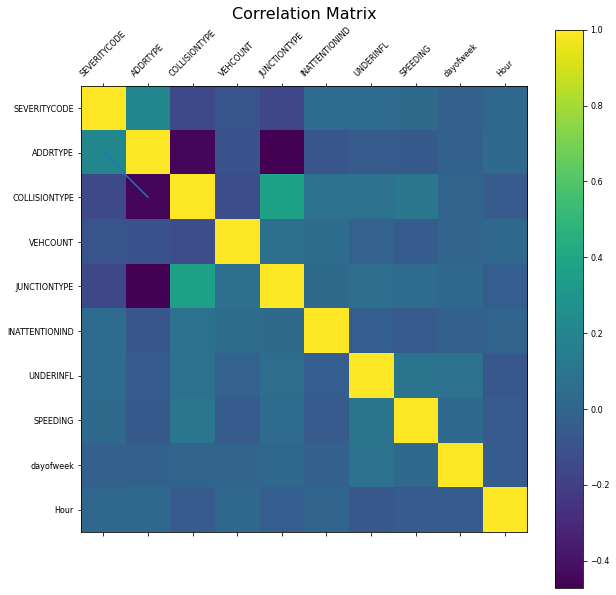

In [86]:
#let's visualize the correlations
f = plt.figure(figsize=(10, 10))
plt.matshow(Feature.corr(), fignum=f.number)
plt.xticks(range(Feature.shape[1]), Feature.columns, fontsize=8, rotation=45)
plt.yticks(range(Feature.shape[1]), Feature.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=16);
plt.plot([1,2])
f.savefig('test.png', bbox_inches='tight')

In [87]:
Feature.drop(columns=[ 'SEVERITYCODE'],axis=1,inplace=True)
X = Feature.values
X[0:5]

array([[ 1,  0,  2,  1,  0,  0,  0,  2, 14],
       [ 0, 11,  2,  2,  0,  0,  0,  2, 18],
       [ 0,  6,  3,  2,  0,  0,  0,  3, 10],
       [ 0, 10,  3,  2,  0,  0,  0,  4,  9],
       [ 1,  0,  2,  1,  0,  0,  0,  2,  8]], dtype=int64)

In [88]:
# let' set out independent variable 
Y = df['SEVERITYCODE'].values
print(Y[0:5])
type(Y)

[2 1 1 1 2]


numpy.ndarray

In [89]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.37609549, -1.61543555,  0.05066432, -0.70835155, -0.44305634,
        -0.23442322, -0.22508012, -0.49508378,  0.20461975],
       [-0.72669375,  1.32653435,  0.05066432,  0.94795427, -0.44305634,
        -0.23442322, -0.22508012, -0.49508378,  0.86249285],
       [-0.72669375, -0.0107247 ,  1.82925322,  0.94795427, -0.44305634,
        -0.23442322, -0.22508012,  0.02378129, -0.45325334],
       [-0.72669375,  1.05908254,  1.82925322,  0.94795427, -0.44305634,
        -0.23442322, -0.22508012,  0.54264636, -0.61772162],
       [ 1.37609549, -1.61543555,  0.05066432, -0.70835155, -0.44305634,
        -0.23442322, -0.22508012, -0.49508378, -0.78218989]])

# for KNN cluster

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (122956, 9) (122956,)
Test set: (40986, 9) (40986,)


In [91]:
#find the best K
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KSEVERITY = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=KSEVERITY.predict(X_test)
   
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

print("mean accuracy is for differnt k is ", mean_acc)

mean accuracy is for differnt k is  [0.68135461 0.71883082 0.70738789 0.73063973 0.71873323 0.73427512
 0.72312497 0.73493388 0.72878544 0.7380569  0.73200605 0.73895964
 0.73303079 0.74113112]


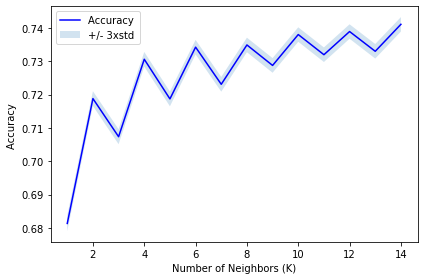

In [92]:
#plot accuracy to find the best K
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.20)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [93]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7411311179427121 with k= 14


In [94]:
#implement the model with best value of K which is 14
k = 14
#Train Model and Predict  
KSEVERITY = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
print(KSEVERITY)


KNeighborsClassifier(n_neighbors=14)


# Logistic Regression

In [95]:
# will create the logistic regression first
from sklearn.linear_model import LogisticRegression

SEVERITYLR = LogisticRegression(C=0.01, solver="newton-cg").fit(X_train,Y_train)
yhat = SEVERITYLR.predict(X_test)
print(yhat [0:5])
yhat_prob = SEVERITYLR.predict_proba(X_test)
print(yhat_prob [0:5])


[1 1 1 1 1]
[[0.77740932 0.22259068]
 [0.66488274 0.33511726]
 [0.69491518 0.30508482]
 [0.80103424 0.19896576]
 [0.62845545 0.37154455]]


# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

SEVERITYTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
SEVERITYTree.fit(X_train,Y_train)
predTree = SEVERITYTree.predict(X_test)
print (predTree)

[1 1 2 ... 2 1 1]


In [97]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.7546479285609721


In [98]:
#conda install -c anaconda python-graphviz

In [99]:
#!pip install graphviz
#!pip install pydotplus
#!conda install graphviz
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [100]:
#import graphviz 
import pydotplus
import matplotlib.image as mpimg
from six import StringIO
from sklearn import tree

In [101]:
#!pip install six

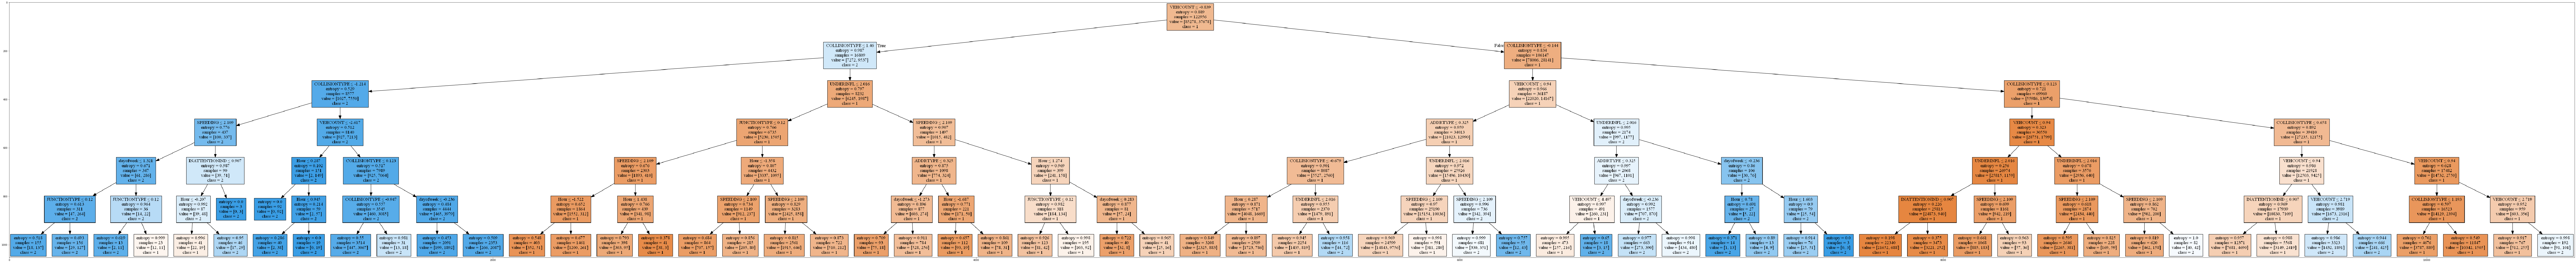

In [102]:
dot_data = StringIO()
filename = "Sevrtree.png"
featureNames = Feature.columns
targetNames = Y
out=tree.export_graphviz(SEVERITYTree,feature_names=featureNames, 
                         out_file=dot_data, 
                         class_names= np.unique(Y_train).astype(str)
                         ,filled=True
                         ,special_characters=True
                         ,rotate=False
                        )  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200,200))
plt.imshow(img,interpolation='nearest') 

# SVM

In [103]:
from sklearn import svm

In [104]:
SEVERITYSVM = svm.SVC(kernel='sigmoid')
SEVERITYSVM.fit(X_train, Y_train) 
yhat = SEVERITYSVM.predict(X_test)
yhat [0:5]

array([1, 1, 2, 1, 1], dtype=int64)

# model evaluation

In [105]:
#fetch random records from cleaned dataset.
df_Test=df.sample(frac=0.25)

In [106]:
#apply encoding

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Non Intersection','Intersection Related','Driveway Junction','Ramp Junction'])
df_Test["JUNCTIONTYPE"] = le_lc.transform(df_Test["JUNCTIONTYPE"]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Block','Intersection'])
df_Test["ADDRTYPE"] = le_lc.transform(df_Test["ADDRTYPE"]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Angles', 'Sideswipe', 'Parked Car', 'Same Direction',
       'Rear Ended', 'Head On', 'Struck Object', 'Cycles', 'Left Turn',
       'Driveway', 'Pedestrian', 'Breakdown', 'Right Turn'])
df_Test["COLLISIONTYPE"] = le_lc.transform(df_Test["COLLISIONTYPE"]) 

In [107]:
X_Eval=df_Test[['ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE','INATTENTIONIND','UNDERINFL', 'SPEEDING','dayofweek', 'Hour']].values

In [108]:
X_Eval = preprocessing.StandardScaler().fit(X_Eval).transform(X_Eval)
print(X_Eval[0:5])

[[-0.72943291  1.33079971  0.05156834 -0.70507864  2.25450968 -0.23482685
  -0.22613866  1.5831479   0.03661222]
 [-0.72943291  1.06384907  0.05156834  0.95231716 -0.44355543 -0.23482685
  -0.22613866  1.06362878  0.20106026]
 [-0.72943291 -0.00395352  0.05156834 -2.36247445 -0.44355543 -0.23482685
  -0.22613866  0.02459052  0.03661222]
 [ 1.370928   -1.07175611 -1.73354974 -0.70507864 -0.44355543 -0.23482685
  -0.22613866 -1.01444773  0.69440438]
 [-0.72943291 -1.6056574   1.83668641 -2.36247445 -0.44355543 -0.23482685
  -0.22613866  0.02459052  0.69440438]]


In [109]:
Y_Eval = df_Test['SEVERITYCODE'].values
print(Y_Eval[0:5])

[1 1 1 2 1]


In [110]:
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [111]:
KSEVERITY_yhat = KSEVERITY.predict(X_Eval)
KSEVERITY_yhat_prob = KSEVERITY.predict_proba(X_Eval)

print("KNN Jaccard index: %.3f" % jaccard_score(Y_Eval, KSEVERITY_yhat))
print("KNN F1-score: %.3f" % f1_score(Y_Eval, KSEVERITY_yhat, average='weighted') )
print("KNN LogLoss: %.3f" % log_loss(Y_Eval, KSEVERITY_yhat_prob))

KNN Jaccard index: 0.719
KNN F1-score: 0.724
KNN LogLoss: 0.655


In [112]:
SEVERITYTree_yhat = SEVERITYTree.predict(X_Eval)
SEVERITYTree_yhat_prob = SEVERITYTree.predict_proba(X_Eval)
print("DT Jaccard index: %.3f" % jaccard_score(Y_Eval, SEVERITYTree_yhat))
print("DT F1-score: %.3f" % f1_score(Y_Eval, SEVERITYTree_yhat, average='weighted') )
print("DT LogLoss: %.3f" % log_loss(Y_Eval, SEVERITYTree_yhat_prob))

DT Jaccard index: 0.730
DT F1-score: 0.718
DT LogLoss: 0.488


In [113]:
SEVERITYLR_yhat = SEVERITYLR.predict(X_Eval)
SEVERITYLR_yhat_prob = SEVERITYLR.predict_proba(X_Eval)
print("LR Jaccard index: %.3f" % jaccard_score(Y_Eval, SEVERITYLR_yhat))
print("LR F1-score: %.3f" % f1_score(Y_Eval, SEVERITYLR_yhat, average='weighted') )
print("LR LogLoss: %.3f" % log_loss(Y_Eval, SEVERITYLR_yhat_prob))

LR Jaccard index: 0.696
LR F1-score: 0.626
LR LogLoss: 0.583


In [114]:
SEVERITYSVM_yhat = SEVERITYSVM.predict(X_Eval)
print("SVM Jaccard index: %.3f" % jaccard_score(Y_Eval, SEVERITYSVM_yhat))
print("SVM F1-score: %.3f" % f1_score(Y_Eval, SEVERITYSVM_yhat, average='weighted') )


SVM Jaccard index: 0.553
SVM F1-score: 0.600


Let's visualize the models using confusion matrix and classification report

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           1       0.77      0.92      0.84     28436
           2       0.67      0.36      0.47     12550

    accuracy                           0.75     40986
   macro avg       0.72      0.64      0.65     40986
weighted avg       0.74      0.75      0.72     40986

Normalized confusion matrix
[[0.92 0.08]
 [0.64 0.36]]


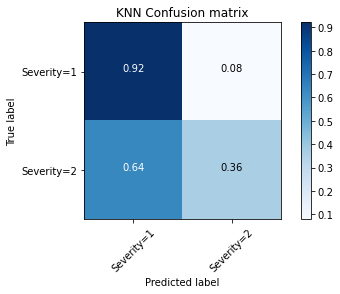

In [116]:

#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, KSEVERITY_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, KSEVERITY_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True,  title='KNN Confusion matrix')

              precision    recall  f1-score   support

           1       0.76      0.95      0.84     28436
           2       0.75      0.30      0.43     12550

    accuracy                           0.76     40986
   macro avg       0.75      0.63      0.64     40986
weighted avg       0.75      0.76      0.72     40986

Normalized confusion matrix
[[0.95 0.05]
 [0.7  0.3 ]]


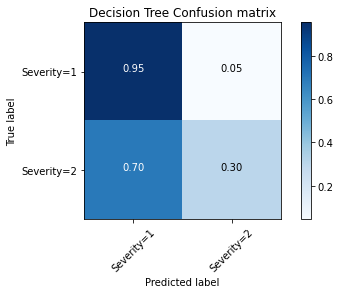

In [117]:

#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, SEVERITYTree_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, SEVERITYTree_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True,  title='Decision Tree Confusion matrix')

              precision    recall  f1-score   support

           1       0.71      0.97      0.82     28436
           2       0.62      0.11      0.19     12550

    accuracy                           0.71     40986
   macro avg       0.67      0.54      0.50     40986
weighted avg       0.68      0.71      0.63     40986

Normalized confusion matrix
[[0.97 0.03]
 [0.89 0.11]]


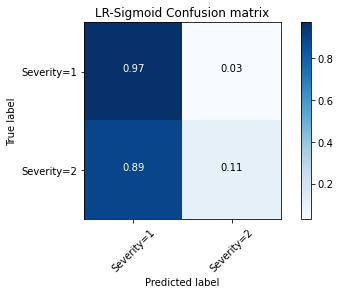

In [118]:

#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, SEVERITYLR_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, SEVERITYLR_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True,  title='LR-Sigmoid Confusion matrix')

              precision    recall  f1-score   support

           1       0.71      0.71      0.71     28436
           2       0.35      0.35      0.35     12550

    accuracy                           0.60     40986
   macro avg       0.53      0.53      0.53     40986
weighted avg       0.60      0.60      0.60     40986

Normalized confusion matrix
[[0.71 0.29]
 [0.65 0.35]]


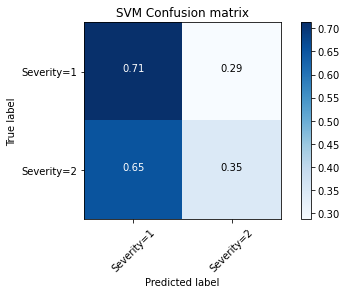

In [119]:

#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, SEVERITYSVM_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, SEVERITYSVM_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True
                    ,  title='SVM Confusion matrix')

from the performance and confusion matrix seems KNN is best fit here